<a href="https://colab.research.google.com/github/juniors719/dry_bean_classifier/blob/develop/dry_bean_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente e baixando os dados

### Instalação das bibliotecas

In [3]:
%pip install pandas matplotlib openpyxl

### Importação das biliotecas

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Validação Cruzada e Métricas
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Otimização de Hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importação dos dados

### Carregando o conjunto de dados a partir de um arquivo Excel

In [6]:
df = pd.read_excel("https://github.com/juniors719/dry_bean_classifier/raw/refs/heads/main/DryBeanDataset/Dry_Bean_Dataset.xlsx")

O conjunto de dados de feijão seco é carregado diretamente de um arquivo Excel hospedado no GitHub usando a função read_excel do pandas.

### Mostrando as 5 primeiras linhas

In [7]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


O método `head()` foi utilizado para visualizar as primeiras 5 linhas do DataFrame. Isso ajuda a obter uma visão inicial dos dados, incluindo as colunas e alguns valores de amostra.

### Informações do dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

O método `describe()` é utilizado para gerar estatísticas descritivas, como a média, desvio padrão, valores mínimo e máximo, e os quartis das colunas numéricas do DataFrame.

### Estatísticas descritivas

In [9]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


O método `describe()` é utilizado para gerar estatísticas descritivas, como a média, desvio padrão, valores mínimo e máximo, e os quartis das colunas numéricas do DataFrame.

# Visualização dos Dados

### Visualização da distribuição das classes de feijão no conjunto de dados

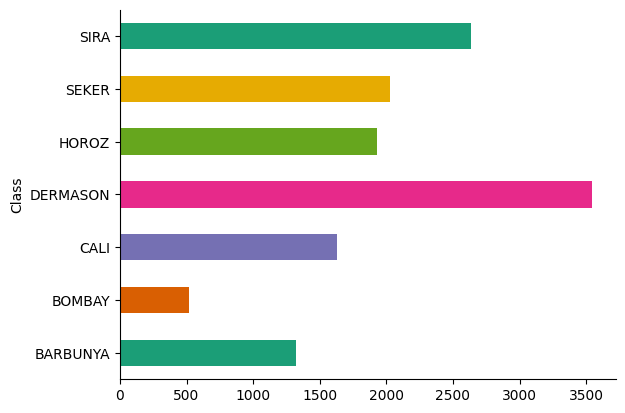

In [10]:
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Foi gerada uma visualização da distribuição das diferentes classes de feijão no conjunto de dados utilizando um gráfico de barras horizontais. Esse gráfico mostra o número de amostras de cada classe, facilitando a análise da representatividade das diferentes variedades de feijão presentes no dataset.

### Visualização da distribuição da feature "Area" no conjunto de dados com histograma

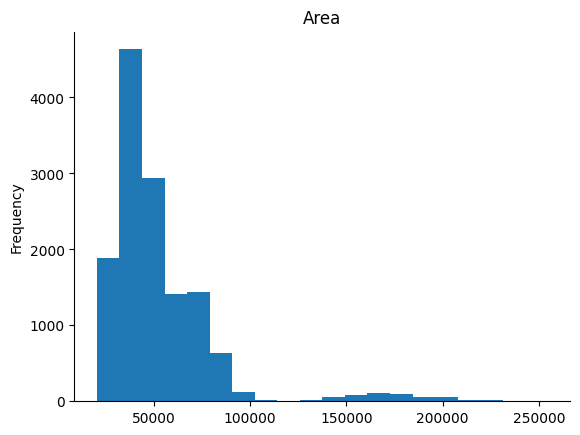

In [11]:
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

A distribuição da feature "Area" foi visualizada por meio de um histograma, utilizando 20 bins. Esse gráfico permite observar a frequência das diferentes áreas dos grãos de feijão, oferecendo insights sobre a concentração de valores e possíveis variações entre os dados.

### Verificar dados ausentes

In [15]:
missing_values = df.isnull().sum()

print(missing_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


A verificação de dados ausentes revelou que o conjunto de dados está completo, sem valores ausentes em nenhuma das colunas. Todos os campos, incluindo as características e a classe, estão totalmente preenchidos.

Foi utilizdo o método `isnull().sum()` para contar quantos valores ausentes existem em cada coluna do DataFrame. Como a saída mostra 0 para todas as colunas, significa que não há dados faltando no conjunto.

# Divisão dos dados

### Definição de X (features) e y (target)

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

As features (variáveis independentes) foram atribuídas à variável X, enquanto a variável-alvo (classe do grão) foi atribuída à variável y. A coluna "Class", que representa o tipo de feijão, foi separada das demais variáveis numéricas para posterior treinamento dos modelos de classificação.

### Split do dataset em treino e teste (80/20) com estratificação

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

O conjunto de dados foi dividido em 80% para treino e 20% para teste utilizando o train_test_split. O parâmetro stratify=y garante que a distribuição das classes seja proporcional nos dois conjuntos, mesmo para as classes com menos representatividade. A utilização de random_state=42 assegura a reprodutibilidade dos resultados.

In [14]:
print("Adicionei esses print pra gente visualizar melhor")
print("\nDistribuição das classes no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição das classes no teste:")
print(y_test.value_counts(normalize=True))

Adicionei esses print pra gente visualizar melhor

Distribuição das classes no treino:
Class
DERMASON    0.260562
SIRA        0.193699
SEKER       0.148880
HOROZ       0.141624
CALI        0.119765
BARBUNYA    0.097079
BOMBAY      0.038391
Name: proportion, dtype: float64

Distribuição das classes no teste:
Class
DERMASON    0.260375
SIRA        0.193537
SEKER       0.149100
HOROZ       0.141755
CALI        0.119721
BARBUNYA    0.097319
BOMBAY      0.038193
Name: proportion, dtype: float64


Note que, ao exibir a distribuição das classes nos conjuntos de treino e teste, podemos observar que as proporções de cada classe são muito semelhantes em ambos os conjuntos. Isso confirma que a estratificação foi realizada corretamente.

# Pré-processamento dos dados

### Escalonamento de características

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Média do treino (após escalonamento):", X_train_scaled.mean(axis=0))
print("Desvio padrão do treino (após escalonamento):", X_train_scaled.std(axis=0))

Média do treino (após escalonamento): [ 1.18771839e-16  3.49136998e-16  2.13397754e-16 -2.74741451e-16
 -5.85375490e-16 -7.64185841e-16 -9.85414705e-17 -2.77351821e-16
 -4.48983654e-16  2.85535331e-14 -1.16030950e-15 -4.33974026e-16
  5.78196973e-16 -8.06604355e-16  4.37236988e-17 -1.82660646e-14]
Desvio padrão do treino (após escalonamento): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Após o escalonamento com o StandardScaler, as médias das colunas do conjunto de treino estão muito próximas de zero, o que indica que o escalonamento foi bem-sucedido. O objetivo do StandardScaler é centralizar os dados em torno de zero.

Além disso, o desvio padrão de todas as variáveis é 1, como esperado, pois o StandardScaler também ajusta os dados para ter um desvio padrão de 1. Isso é importante para garantir que as variáveis tenham a mesma escala, evitando que variáveis com maior magnitude dominem o modelo.

# Treinamento

### Definindo os modelos

In [57]:
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 20]
        }
    },
    "DT": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 20],
            "min_samples_split": [2, 12, 20]
        }
    },
    "OVR": {
        "model": OneVsRestClassifier(LogisticRegression(random_state=42, solver="saga", max_iter=3000)),
        "params": {
            "estimator__C": [0.01, 0.1, 1],
            "estimator__penalty": ["l1", "l2"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    }
}

In [49]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, scaled=False):
    results = []
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, config in models.items():
        print(f"\nTreinando {model_name} (Escalonado: {scaled})...")

        grid_search = GridSearchCV(
            config["model"],
            config["params"],
            cv=kfold,
            scoring="accuracy",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_

        cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)

        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append({
            "Modelo": model_name,
            "Melhores Parâmetros": grid_search.best_params_,
            "Acurácia (Validação Cruzada)": cv_scores.mean(),
            "Acurácia (Teste)": accuracy,
            "Precisão": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Escalonado": scaled
        })

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(
            cm, annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_
        )
        plt.title(f"Matriz de Confusão - {model_name} (Escalonado: {scaled})")
        plt.xlabel("Predito")
        plt.ylabel("Real")
        plt.show()

    return pd.DataFrame(results)

In [ ]:
# Dados NÃO escalonados
results_no_scale = train_and_evaluate_models(X_train, X_test, y_train, y_test, scaled=False)

# Dados Escalonados
results_scaled = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, scaled=True)

# Combina resultados
final_results = pd.concat([results_no_scale, results_scaled], ignore_index=True)


Treinando Random Forest (Escalonado: False)...


📊 Resultados dos Modelos:


,Modelo,Melhores Parâmetros,Acurácia (Validação Cruzada),Acurácia (Teste),Precisão,Recall,F1-Score,Escalonado
0,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.925330,0.919941,0.919940,0.919941,0.919847,False
3,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.925330,0.919941,0.919940,0.919941,0.919847,True
5,KNN,"{'n_neighbors': 7, 'weights': 'distance'}",0.925423,0.916636,0.917321,0.916636,0.916787,True
1,DT,"{'max_depth': 20, 'min_samples_split': 20}",0.902002,0.901946,0.901747,0.901946,0.901592,False
4,DT,"{'max_depth': 20, 'min_samples_split': 20}",0.902094,0.901946,0.901747,0.901946,0.901592,True
2,KNN,"{'n_neighbors': 5, 'weights': 'distance'}",0.733467,0.744767,0.745520,0.744767,0.742335,False


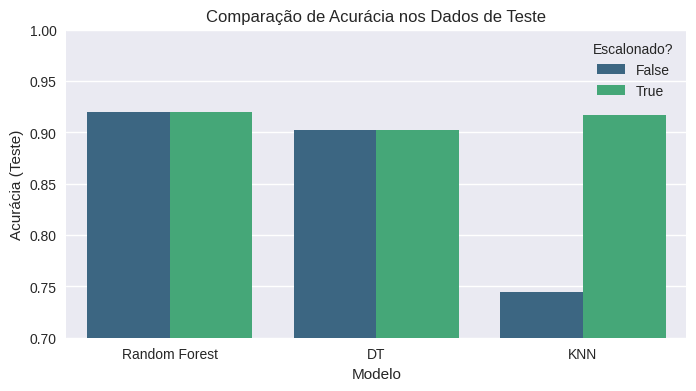

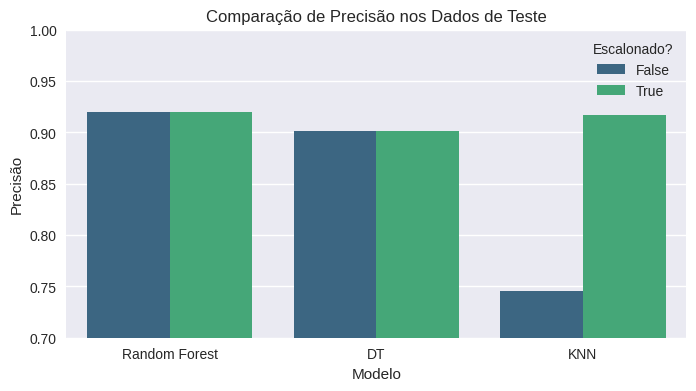

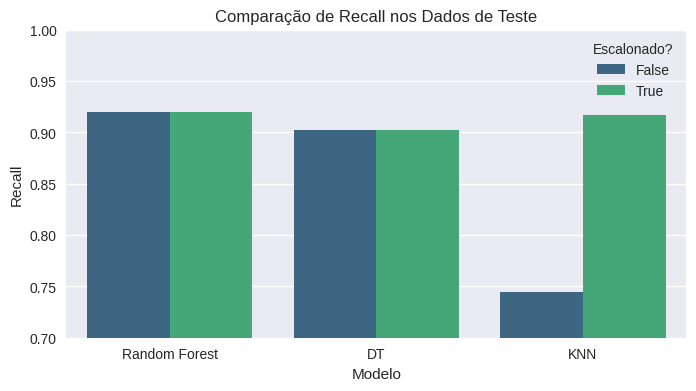

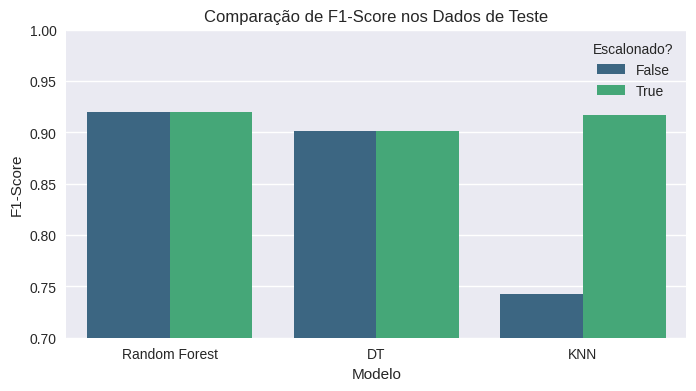

In [46]:
print("📊 Resultados dos Modelos:")
display(final_results.sort_values(by="Acurácia (Teste)", ascending=False))

# Configuração do estilo
plt.style.use("seaborn-v0_8")  # Ou outro estilo disponível

# Gráfico de Acurácia (Teste)
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="Acurácia (Teste)",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Comparação de Acurácia nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

# Gráfico de Precisão
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="Precisão",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Comparação de Precisão nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

# Gráfico de Recall
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="Recall",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Comparação de Recall nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

# Gráfico de F1-Score
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="F1-Score",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Comparação de F1-Score nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

In [45]:
import joblib
best_model = ...  # Definir o melhor modelo
joblib.dump(best_model, "melhor_modelo.pkl")

['melhor_modelo.pkl']